**Author:** Nirmal Kumar Marimuthu

**Course:** Physics 434 - Data Analysis Lab  

In this laboratory we will practice more about Variable of Transformation and Probability Distribution functions. 

## Instruction: Numpy random seed

Sometimes it's useful to have a reproducible random series for checking results. To do this, the easiest way is to set the seeding of a random number generator. For `Numpy`,

```python
import numpy as np
np.random.seed(42)
```

This makes the random numbers predictable and helps with checking results.

## Import Libraries

**TODO:** Import necessary libraries for this lab.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
np.random.seed(0)

# Variable of Transformation (3 points)

For a random distribution of x between 0 and 1. With variable of transformation $u=f(x)$, we can calculate the probability density function $g(u)$ using analytic method. In this assignment, we will draw a random sample from the uniform distribution, apply a transformation to each data point, and check the consistency of transformed distributions with the analytic prediction.

## Part 1: Transformation $u = x^2$

**TODO:** Complete the following steps:

1. Draw a 1000 events sample $x_i, i=0,1,...999$ using built-in distributions in scipy with Uniform density between 0 and 1.
2. For each value of $x_i$, calculate the transformed value $u = x^2$.
3. Draw the $u_i$ distribution. Plot the analytic solution g(u) in the same plot and compare the consistency.
4. Show details about how you derive $g(u)$ analytically.

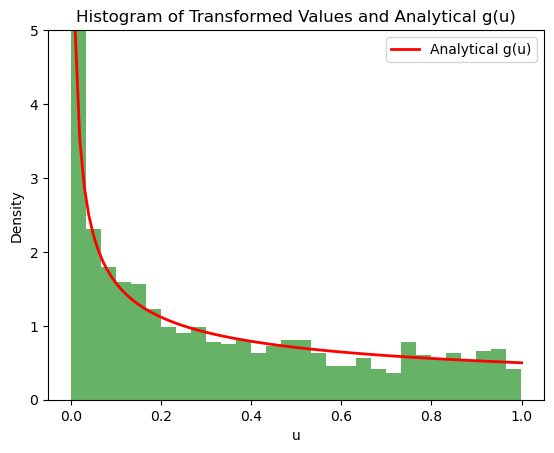

In [2]:
#Generate 1000 uniform random samples between 0 and 1
x_samples = np.random.uniform(0, 1, 1000)

#Apply transformation u = x^2
u_samples = x_samples**2

#Plot histogram of transformed values
# Also plot the analytical solution g(u)
fig, ax = plt.subplots()
ax.hist(u_samples, bins=30, density=True, alpha=0.6, color='g')
u = np.linspace(0, 1, 100)
if np.any(u == 0):
    u[0] = 1e-10  # Avoid division by zero
g_u = 1 / (2 * np.sqrt(u))  # Analytical PDF for u
ax.plot(u, g_u, 'r-', lw=2, label='Analytical g(u)')
ax.set_xlabel('u')
ax.set_ylabel('Density')
ax.set_ylim(0, 5)
ax.set_title('Histogram of Transformed Values and Analytical g(u)')
ax.legend()
plt.show()


# For u = x^2, with x ~ Uniform(0,1), derive g(u)
# The CDF of x is F(x) = x for x in [0,1]
# The CDF of u is G(u) = P(U ≤ u) = P(X
# = sqrt(u)) = sqrt(u) for u in [0,1]
# The PDF g(u) = dG/du = 1/(2*sqrt(u)) for u in [0,1]
# This matches the histogram of the transformed samples.

## Part 2: Additional Transformation

**TODO:** Repeat the analysis with one of the following transformations:
- a. $u = 1/x$
- b. $u = \sqrt{x}$
- c. $u = e^x$
- d. $u = \log(x)$

Choose one transformation and complete the same analysis as Part 1.

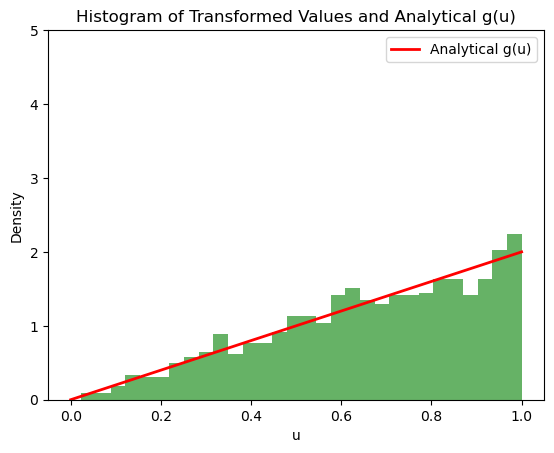

In [3]:
# Let's choose the transformation u = sqrt(x)
# Apply transformation u = sqrt(x)
u_samples = np.sqrt(x_samples)

# Plot histogram of transformed values
# Also plot the analytical solution g(u)
fig, ax = plt.subplots()
ax.hist(u_samples, bins=30, density=True, alpha=0.6, color='g')
u = np.linspace(0, 1, 100)
if np.any(u == 0):
    u[0] = 1e-10  # Avoid division by zero
g_u = 2 * u  # Analytical PDF for u = sqrt(x)
ax.plot(u, g_u, 'r-', lw=2, label='Analytical g(u)')
ax.set_xlabel('u')
ax.set_ylabel('Density')
ax.set_ylim(0, 5)
ax.set_title('Histogram of Transformed Values and Analytical g(u)')
ax.legend()
plt.show()

# For u = sqrt(x), with x ~ Uniform(0,1), derive g(u)
# The CDF of x is F(x) = x for x in [0,1]
# The CDF of u is G(u) = P(U ≤ u) = P(X
# = u^2) = u^2 for u in [0,1]
# The PDF g(u) = dG/du = 2u for u in [0,1]
# This matches the histogram of the transformed samples.

# Throwing two dices (3 points)

We can simulate a fair dice by drawing a random uniform distribution of x between 0 and 1. There are multiple ways to do so, e.g. multiply a random number x by 6, take the integer part of the number and add it by one ($[0, 1] \rightarrow [0, 5] \rightarrow [1, 6]$), or use `numpy.random.uniform()`. This number represents the face of the dice. We can repeat this procedure to simulate rolling the dice N times.

**TODO:** Complete the following steps:

1. Simulate a pair of dices N=1000 times.
2. Calculate the sum of each pair.
3. Draw the distribution of the sum.
4. Calculate mean and variance of the distribution of the Sum.
5. Calculate the probability of Sevens (i.e. sum of two dices equals to 7) by taking the ratio of this number of Sevens to 1000. Evaluate the statistical uncertainty of the probability (assuming Binomial errors).
6. Compare the probability of Sevens from Step 5 to the analytic calculation based on the homework method. Discuss consistency between the simulation and analytical calculation.

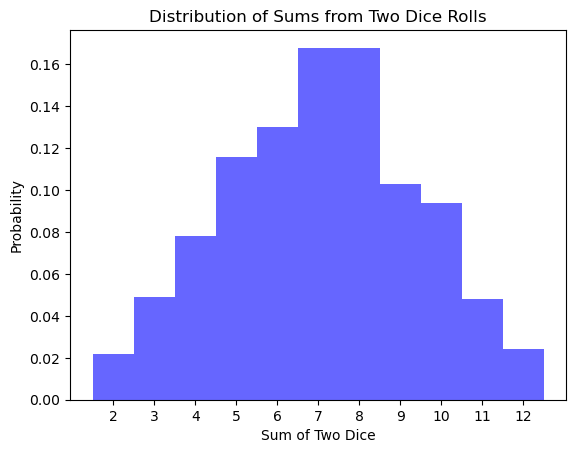

Mean of sums: 7.066, Variance of sums: 5.419644
Probability of rolling a seven: 0.168 ± 0.011822690049223147


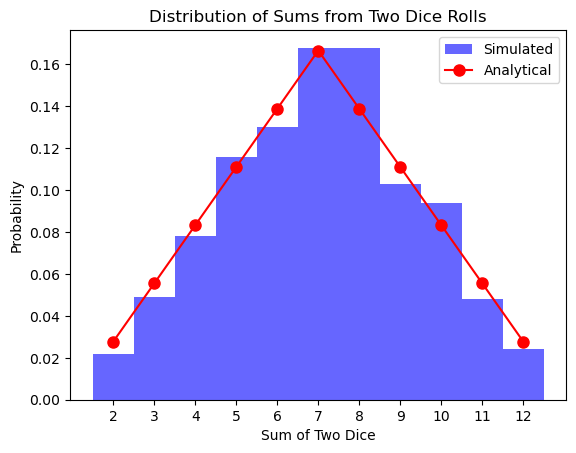

In [4]:
#Simulate throwing two dice N=1000 times
dice_rolls = np.random.randint(1, 7, size=(1000, 2))

#Calculate sum of each pair of dice
sums = np.sum(dice_rolls, axis=1)

#Plot distribution of sums
plt.hist(sums, bins=np.arange(2, 14)-0.5, density=True, alpha=0.6, color='b')
plt.xlabel('Sum of Two Dice')
plt.ylabel('Probability')
plt.title('Distribution of Sums from Two Dice Rolls')
plt.xticks(range(2, 13))
plt.show()

#Calculate mean and variance
mean_sum = np.mean(sums)
variance_sum = np.var(sums)
print(f"Mean of sums: {mean_sum}, Variance of sums: {variance_sum}")

#Calculate probability of sevens and statistical uncertainty
num_sevens = np.sum(sums == 7)
prob_seven = num_sevens / len(dice_rolls)
std_dev_seven = np.sqrt(prob_seven * (1 - prob_seven) / len(dice_rolls))
print(f"Probability of rolling a seven: {prob_seven} ± {std_dev_seven}")


#Compare with analytical calculation (1/6 probability) on a histogram plot
x = np.linspace(2, 12, 100)
analytical_probs = [1/36, 2/36, 3/36, 4/36, 5/36, 6/36, 5/36, 4/36, 3/36, 2/36, 1/36]   # Probabilities for sums 2 to 12
plt.hist(sums, bins=np.arange(2, 14)-0.5, density=True, alpha=0.6, color='b', label='Simulated')
plt.plot(range(2, 13), analytical_probs, 'ro-', label='Analytical', markersize=8)
plt.xlabel('Sum of Two Dice')
plt.ylabel('Probability')
plt.title('Distribution of Sums from Two Dice Rolls')
plt.xticks(range(2, 13))
plt.legend()

# Central Limit Theorem (4 points)

The central limit theorem states that the distribution of the sample mean $\bar{x}$, 
$\bar{x} = \frac{1}{N} \sum_{i=1}^{N} x_i$,
of N variables $x_i$ with finite variance $\sigma^2$ in the limit $N\to \infty$ will approach a normal distribution with variance $\sigma^2/N$ independent of the form of the distribution f(x). In this computational experiment, we will test this theorem.

Generate a M=5 event sample using built-in Poisson distributions in scipy with $\lambda=2.0$. From these 5 events, calculate mean $\mu_5$ and standard deviation $\sigma_5$. Repeat this process N times. For each time, you will draw different set of M=5 events, and calculate independent $\mu_5$ and $\sigma_5$, respectively.

## Part 1: N=10 samples

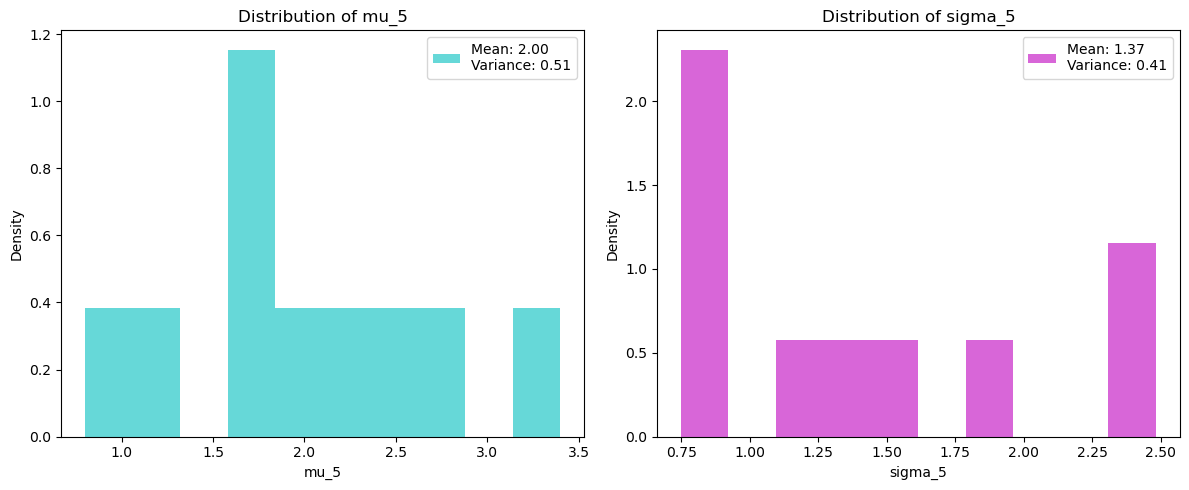

In [5]:
#Let N=10. Generate N sets of M=5 Poisson samples with lambda=2.0
N = 10
M = 5
lambda_param = 2.0
poisson_samples = np.random.poisson(lambda_param, (N, M))
# Calculate mu_5 and sigma_5 for each set
mu_5 = np.mean(poisson_samples, axis=1)
sigma_5 = np.std(poisson_samples, axis=1)
# Plot distributions of mu_5 and sigma_5
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.hist(mu_5, bins=10, density=True, alpha=0.6, color='c')
ax1.set_title('Distribution of mu_5')
ax1.set_xlabel('mu_5')
ax1.set_ylabel('Density')
ax2.hist(sigma_5, bins=10, density=True, alpha=0.6, color='m')
ax2.set_title('Distribution of sigma_5')
ax2.set_xlabel('sigma_5')
ax2.set_ylabel('Density')
plt.tight_layout()
mean_mu_5 = np.mean(mu_5)
var_mu_5 = np.var(mu_5)
mean_sigma_5 = np.mean(sigma_5)
var_sigma_5 = np.var(sigma_5)
ax1.legend([f'Mean: {mean_mu_5:.2f}\nVariance: {var_mu_5:.2f}'])
ax2.legend([f'Mean: {mean_sigma_5:.2f}\nVariance: {var_sigma_5:.2f}'])
plt.show()

## Part 2: N=100 samples

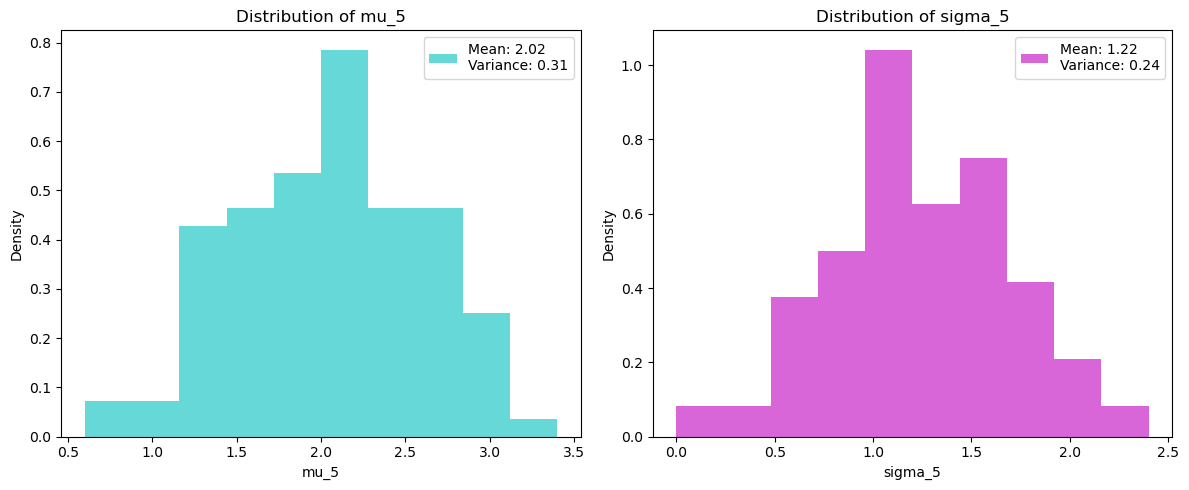

In [6]:
#Let N=100. Generate N sets of M=5 Poisson samples with lambda=2.0
N = 100
M = 5
lambda_param = 2.0
poisson_samples = np.random.poisson(lambda_param, (N, M))
# Calculate mu_5 and sigma_5 for each set
mu_5 = np.mean(poisson_samples, axis=1)
sigma_5 = np.std(poisson_samples, axis=1)
# Plot distributions of mu_5 and sigma_5
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.hist(mu_5, bins=10, density=True, alpha=0.6, color='c')
ax1.set_title('Distribution of mu_5')
ax1.set_xlabel('mu_5')
ax1.set_ylabel('Density')
ax2.hist(sigma_5, bins=10, density=True, alpha=0.6, color='m')
ax2.set_title('Distribution of sigma_5')
ax2.set_xlabel('sigma_5')
ax2.set_ylabel('Density')
plt.tight_layout()
mean_mu_5 = np.mean(mu_5)
var_mu_5 = np.var(mu_5)
mean_sigma_5 = np.mean(sigma_5)
var_sigma_5 = np.var(sigma_5)
ax1.legend([f'Mean: {mean_mu_5:.2f}\nVariance: {var_mu_5:.2f}'])
ax2.legend([f'Mean: {mean_sigma_5:.2f}\nVariance: {var_sigma_5:.2f}'])
plt.show()

## Part 3: N=1000 samples

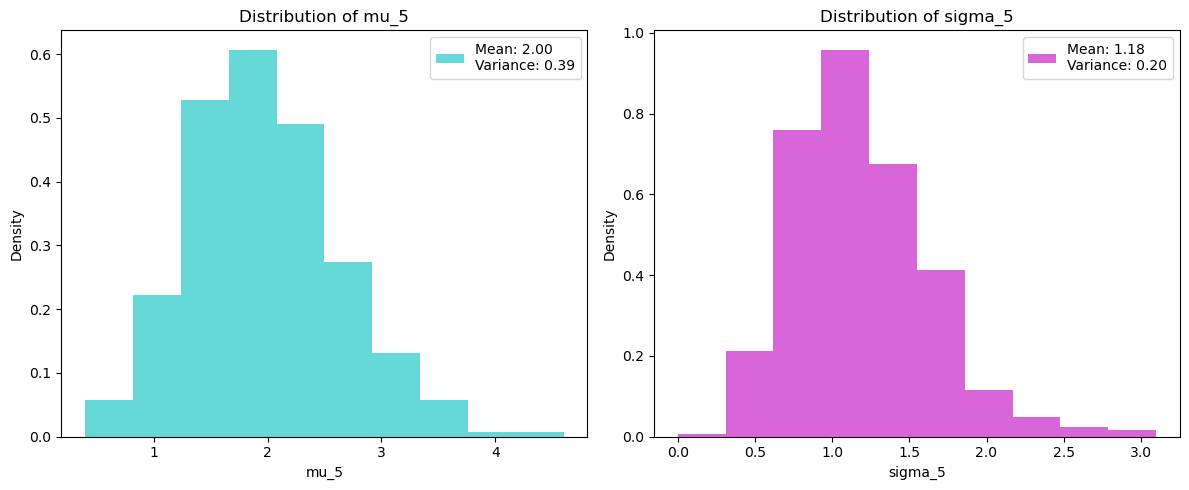

In [7]:
#Let N=1000. Generate N sets of M=5 Poisson samples with lambda=2.0
N = 1000
M = 5
lambda_param = 2.0
poisson_samples = np.random.poisson(lambda_param, (N, M))
# Calculate mu_5 and sigma_5 for each set
mu_5 = np.mean(poisson_samples, axis=1)
sigma_5 = np.std(poisson_samples, axis=1)
# Plot distributions of mu_5 and sigma_5
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.hist(mu_5, bins=10, density=True, alpha=0.6, color='c')
ax1.set_title('Distribution of mu_5')
ax1.set_xlabel('mu_5')
ax1.set_ylabel('Density')
ax2.hist(sigma_5, bins=10, density=True, alpha=0.6, color='m')
ax2.set_title('Distribution of sigma_5')
ax2.set_xlabel('sigma_5')
ax2.set_ylabel('Density')
plt.tight_layout()
mean_mu_5 = np.mean(mu_5)
var_mu_5 = np.var(mu_5)
mean_sigma_5 = np.mean(sigma_5)
var_sigma_5 = np.var(sigma_5)
ax1.legend([f'Mean: {mean_mu_5:.2f}\nVariance: {var_mu_5:.2f}'])
ax2.legend([f'Mean: {mean_sigma_5:.2f}\nVariance: {var_sigma_5:.2f}'])
plt.show()

## Part 4: Discussion

**TODO:** Discuss your observations:
- a. Does $\mu_5$ and $\sigma_5$ approach Normal distributions when N is approaching a larger number?
- b. Is the variance of $\mu_5$ and $\sigma_5$ following some scaling rule as function of N?

a. Yes, as N is approaching larger and larger numbers, mu_5 look like it's approching Normal distribution due to the Central Limit Theorem. Although sigma_5 is still approaching the Normal distrbution, it is more skewed and it is slower than sigma_5.


b. mu_5 does not look like it is following some function of N as when you increase it from 100 -> 1000, it essentially stays the same and looks to converge around     0.4, which makes sense according to CLT (lamda/M = 2/5 = 0.4), but sigma does depend on N and decreases with 1/sqrt(N) as CLT states. 

## Part 5: M=100 events

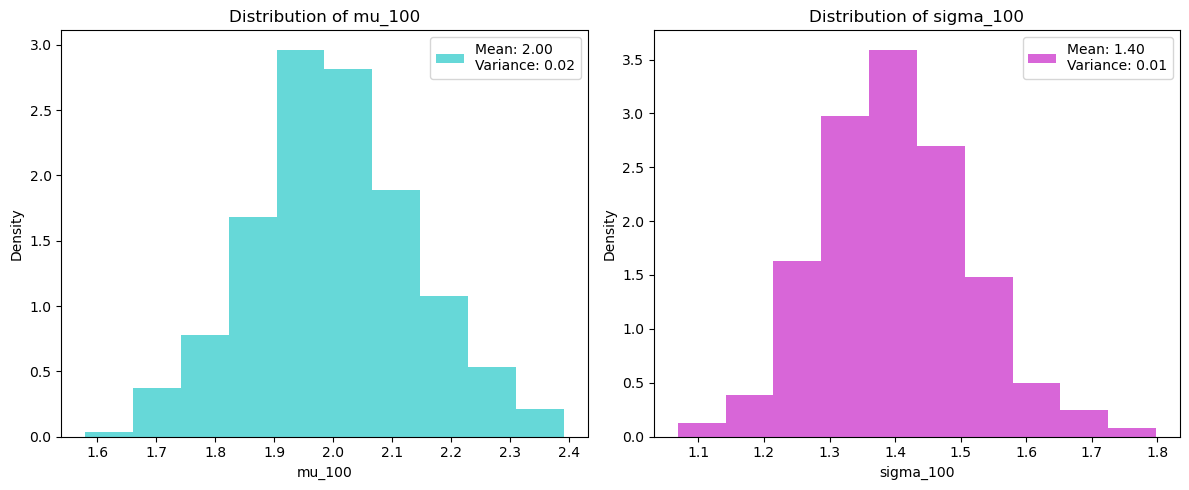

In [8]:
#Let N=1000. Generate N sets of M=100 Poisson samples with lambda=2.0
N = 1000
M = 100
lambda_param = 2.0
poisson_samples = np.random.poisson(lambda_param, (N, M))
# Calculate mu_100 and sigma_100 for each set
mu_100 = np.mean(poisson_samples, axis=1)
sigma_100 = np.std(poisson_samples, axis=1)
# Plot distributions of mu_100 and sigma_100
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.hist(mu_100, bins=10, density=True, alpha=0.6, color='c')
ax1.set_title('Distribution of mu_100')
ax1.set_xlabel('mu_100')
ax1.set_ylabel('Density')
ax2.hist(sigma_100, bins=10, density=True, alpha=0.6, color='m')
ax2.set_title('Distribution of sigma_100')
ax2.set_xlabel('sigma_100')
ax2.set_ylabel('Density')
plt.tight_layout()
mean_mu_100 = np.mean(mu_100)
var_mu_100 = np.var(mu_100)
mean_sigma_100 = np.mean(sigma_100)
var_sigma_100 = np.var(sigma_100)
ax1.legend([f'Mean: {mean_mu_100:.2f}\nVariance: {var_mu_100:.2f}'])
ax2.legend([f'Mean: {mean_sigma_100:.2f}\nVariance: {var_sigma_100:.2f}'])
plt.show()

#Discussion Questions
# When you increase the number of events, you can see that both distributions approach the normal distribution much more.
# You can also observe that the varience becomes really low for both distributions. 

# Bonus (+3 points)

Generate 1000 samples. Each sample is a 100 event dataset using one built-in distribution in scipy but not Binomial, Normal nor Poisson. Show that the mean and variance of these 1000 samples also behave like a Normal Distribution.

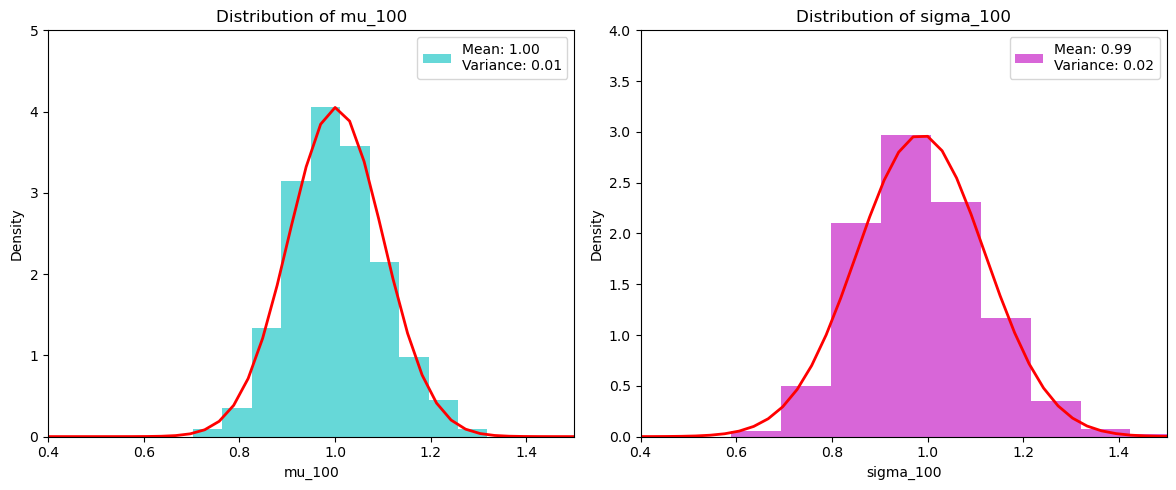

In [ ]:
# Let's choose the exponential distribution with lambda=1.0
# Simulate N samples of M events each from the chosen distribution
N = 1000
M = 100
lambda_param = 1.0
exponential_samples = np.random.exponential(1/lambda_param, (N, M))
# Calculate mean and variance for each sample
mu_100 = np.mean(exponential_samples, axis=1)
sigma_100 = np.std(exponential_samples, axis=1)
# Show that the distributions of means and variances approach Normal
# Plot distributions of mu_100 and sigma_100
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.hist(mu_100, bins=10, density=True, alpha=0.6, color='c')
ax1.set_title('Distribution of mu_100')
ax1.set_xlabel('mu_100')
ax1.set_ylabel('Density')
ax2.hist(sigma_100, bins=10, density=True, alpha=0.6, color='m')
ax2.set_title('Distribution of sigma_100')
ax2.set_xlabel('sigma_100')
ax2.set_ylabel('Density')
plt.tight_layout()
mean_mu_100 = np.mean(mu_100)
var_mu_100 = np.var(mu_100)
mean_sigma_100 = np.mean(sigma_100)
var_sigma_100 = np.var(sigma_100)
ax1.legend([f'Mean: {mean_mu_100:.2f}\nVariance: {var_mu_100:.2f}'])
ax2.legend([f'Mean: {mean_sigma_100:.2f}\nVariance: {var_sigma_100:.2f}'])
# Add normal distribution fits
x_mu = np.linspace(0, 3, 100)
x_sigma = np.linspace(0, 3, 100)
ax1.plot(x_mu, norm.pdf(x_mu, mean_mu_100, np.sqrt(var_mu_100)), 'r-', lw=2)
ax2.plot(x_sigma, norm.pdf(x_sigma, mean_sigma_100, np.sqrt(var_sigma_100)), 'r-', lw=2)
ax1.set_xlim(0.4, 1.5)
ax1.set_ylim(0, 5)
ax2.set_xlim(0.4, 1.5)
ax2.set_ylim(0, 4)
plt.show()


## Summary and Reflection

**TODO:** Reflect on your laboratory experience by discussing these 3 key takeaways:

### 1. Variable Transformations and Analytical Validation
Discuss how well your simulated distributions matched the analytical probability density functions you derived. What did this teach you about the relationship between mathematical transformations and probability distributions? Comment on the importance of being able to validate simulations with analytical solutions.


The simulated distributions matched the analytical probability density functions well when the transformations were applied correctly. This comparison reinforced the idea that mathematical transformations directly reshape probability distributions like scaling or squaring a random variable systematically alters its spread and shape in predictable ways. Validating simulations against analytical PDFs is essential because it confirms that the simulation framework, random number generation, and transformations are implemented correctly. Analytical validation serves as a benchmark, ensuring that any observed behavior in more complex or non-analytical cases truly arises from the model, not from coding or conceptual errors.

### 2. Monte Carlo Methods and Statistical Uncertainty
Based on your dice simulation results, evaluate the reliability of Monte Carlo methods for estimating probabilities. How did your simulated probability of sevens compare to the theoretical 1/6, and what role did statistical uncertainty play in validating your results?


The Monte Carlo simulation of rolling two dice demonstrated that the estimated probability of summing to seven converged closely to the theoretical value of 1/6 as the number of trials increased. For smaller sample sizes, random fluctuations caused noticeable deviations, but as more rolls were simulated, the estimate stabilized around the theoretical probability. This highlights both the strength and limitation of Monte Carlo methods: while they are highly flexible and accurate in the limit of large samples, statistical uncertainty governs how reliable any finite-sample estimate is.

### 3. Central Limit Theorem Universality
Describe your observations of how sample means approached normal distributions as sample size increased, regardless of the underlying distribution (Poisson, and your bonus distribution if completed). What does this reveal about the power and universality of the Central Limit Theorem in statistical analysis?


Across all experiments, the distribution of sample means became increasingly Gaussian as the sample size grew. This convergence occurred regardless of the original shape of the data, demonstrating the universality of the Central Limit Theorem. This universality is what makes the CLT foundational in statistical analysis: it justifies using normal approximations for inference and error estimation across a vast range of real-world problems.


> **📋 Important Notice:** When you have completed all sections of this lab, please download your notebook as an HTML file for submission on Canvas.
> 
> **To download as HTML:**
> 1. Go to **File** → **Download as** → **HTML (.html)**
> 2. Save the file with a descriptive name (e.g., `Lab2_YourName.html`)
> 3. Upload the HTML file to the corresponding Canvas assignment
> 
> Make sure all cells have been executed and all outputs are visible before downloading!